# Logistic Regression Example

For this example we are going to use the [scikit-learn library](https://scikit-learn.org/)

In [ ]:
!pip install scikit-learn

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1. The data

Let's use a simple synthetic dataset. For a practical example, any dataset could be used.

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 0 0 1 1 1 1 1 1]


x has two dimensions:
* One column for a single input
* Ten rows, each corresponding to one observation

y is one-dimensional with ten items (each item corresponds to one observation) - it contains only zeros and ones since this is a binary classification problem.

## 2. The model

More information about the parameters of the LogisticRegression function in scikit-learn [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

We can also get the value of the slope 𝑏₁ (beta) and the intercept 𝑏₀ (alpha) of the linear function 𝑓

In [5]:
print(model.intercept_)
print(model.coef_)

[-0.54278622]
[[0.45940151]]


## 3. Evaluation

Does the model really work for our data? (in fact, we should also test with unseen data)

In [9]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)

print(p_pred)
print(y_pred)
print(y)

[[0.63246033 0.36753967]
 [0.52083411 0.47916589]
 [0.40708796 0.59291204]
 [0.30250062 0.69749938]
 [0.21503812 0.78496188]
 [0.14751556 0.85248444]
 [0.09853381 0.90146619]
 [0.06458402 0.93541598]
 [0.04178936 0.95821064]
 [0.0268094  0.9731906 ]]
[0 0 1 1 1 1 1 1 1 1]
[0 1 0 0 1 1 1 1 1 1]


The score takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

The confusion matrix is also a useful way to analyse the results.

In [10]:
print(model.score(x, y)) # Accuracy
print(confusion_matrix(y, y_pred)) # [[neg. class corr, pos. class miss], [neg. class miss, pos. class corr]]

0.7
[[1 2]
 [1 6]]


A more comprehensive report on the classification can be obtained with the classification_report function

In [8]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.75      0.86      0.80         7

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10



## 4. More

1. Try other parameters of the LogisticRegression function
1. Try using a larger dataset, for example one available in scikit-learn:

        from sklearn.datasets import load_iris
        ...
        x, y = load_iris(return_X_y=True)

3. Analyse the example below where we plot the decision boundary

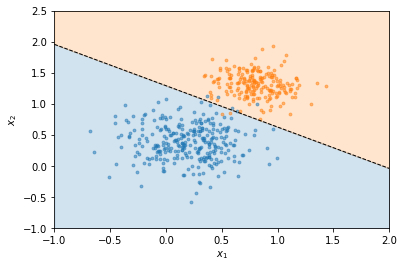

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from io import StringIO 
plt.rc('text', usetex=False)

## from web
import urllib.request
page = urllib.request.urlopen('https://scipython.com/static/media/uploads/blog/logistic_regression/linpts.txt')
txt = page.read().decode('ascii') 
pts = np.loadtxt(StringIO(txt))

## local file
#pts = np.loadtxt('linpts.txt')

X = pts[:,:2]
Y = pts[:,2].astype('int')

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, Y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and slope of the decision boundary
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()
